<a href="https://colab.research.google.com/github/Bibitpamungkas/TugasBesar_Citra/blob/kelompok/Using_Normal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Tulis Program Anda Disini!
# Basic Imports
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image

# Imports untuk membangun CNN
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install kaggle

In [ ]:
%cd /content/gdrive/MyDrive/content/sample_data/

[Errno 2] No such file or directory: '/content/gdrive/MyDrive/content/sample_data/'
/content


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/tmp/"

In [ ]:
# jika anda ingin menggunakan kaggle API untuk mengunduh dataset gunakan
# kode berikut untuk membantu anda membuat config kaggle.json
# pastikan anda mendaftar akun kaggle terlebih dahulu
# kemudian menuju halaman my account dan buat token API anda

api_token = {"username":"bibitpamungkas","key":"0b4a500fd9a858ee152de296398002ab"}
import json
import zipfile
import os
with open('/tmp/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /tmp/kaggle.json

In [ ]:
!kaggle datasets download -d denizkavi1/brain-tumor

 97% 678M/700M [00:02<00:00, 232MB/s]
100% 700M/700M [00:02<00:00, 251MB/s]


In [ ]:
# Ekstrak dataset

import os
import zipfile

os.makedirs('/tmp/brain-tumor')

local_zip = '/content/brain-tumor.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/brain-tumor')
zip_ref.close()

In [ ]:
import os
base_dataset = '/tmp/brain-tumor'
class_dir = ['1','2','3']
for class_item in class_dir:
  cur_dir = base_dataset+"/"+class_item
  dataset = os.listdir(cur_dir)
  for item in dataset:
    if not item.endswith(".png"):
        os.remove(os.path.join(cur_dir, item))

In [ ]:
import os
import shutil

#brain-tumoring dataset manual

dataset_splt = "/tmp/brain-tumor"
os.makedirs('/tmp/brain-tumor/train')
os.makedirs('/tmp/brain-tumor/val')
os.makedirs('/tmp/brain-tumor/test')

train = os.path.join(dataset_splt,'train')
val = os.path.join(dataset_splt,'val')
test = os.path.join(dataset_splt,'test')

#1
x1_dataset = '/tmp/brain-tumor/1'
os.makedirs('/tmp/brain-tumor/train/1')
os.makedirs('/tmp/brain-tumor/val/1')
os.makedirs('/tmp/brain-tumor/test/1')

pp_tr = os.path.join(train,'1')
pp_va = os.path.join(val,'1')
pp_ts = os.path.join(test,'1')

#70% data training
x1_dataset1= os.listdir(x1_dataset)
for file in x1_dataset1[0:int(len(x1_dataset1)* .8)]:
  new_path = shutil.move(f"{x1_dataset}/{file}",pp_tr)

#15% data validation
x1_dataset2= os.listdir(x1_dataset)
for file in x1_dataset2[0:int(len(x1_dataset1)* .19)]:
  new_path = shutil.move(f"{x1_dataset}/{file}",pp_va)

#15% data testing
x1_dataset3= os.listdir(x1_dataset)
for file in x1_dataset3:
  new_path = shutil.move(f"{x1_dataset}/{file}",pp_ts)


#2
y2_dataset = '/tmp/brain-tumor/2'
os.makedirs('/tmp/brain-tumor/train/2')
os.makedirs('/tmp/brain-tumor/val/2')
os.makedirs('/tmp/brain-tumor/test/2')

rk_tr = os.path.join(train,'2')
rk_va = os.path.join(val,'2')
rk_ts = os.path.join(test,'2')

#70% data training
y2_dataset1= os.listdir(y2_dataset)
for file in y2_dataset1[0:int(len(y2_dataset1)* .8)]:
  new_path = shutil.move(f"{y2_dataset}/{file}",rk_tr)

#15% data validation
y2_dataset2= os.listdir(y2_dataset)
for file in y2_dataset2[0:int(len(y2_dataset1)* .19)]:
  new_path = shutil.move(f"{y2_dataset}/{file}",rk_va)

#15% data testing
y2_dataset3= os.listdir(y2_dataset)
for file in y2_dataset3:
  new_path = shutil.move(f"{y2_dataset}/{file}",rk_ts)

#3
z3_dataset = '/tmp/brain-tumor/3'
os.makedirs('/tmp/brain-tumor/train/3')
os.makedirs('/tmp/brain-tumor/val/3')
os.makedirs('/tmp/brain-tumor/test/3')

ss_tr = os.path.join(train,'3')
ss_va = os.path.join(val,'3')
ss_ts = os.path.join(test,'3')

#70% data training
z3_dataset1= os.listdir(z3_dataset)
for file in z3_dataset1[0:int(len(z3_dataset1)* .8)]:
  new_path = shutil.move(f"{z3_dataset}/{file}",ss_tr)

#15% data validation
z3_dataset2= os.listdir(z3_dataset)
for file in z3_dataset2[0:int(len(z3_dataset1)* .19)]:
  new_path = shutil.move(f"{z3_dataset}/{file}",ss_va)

#15% data testing
z3_dataset3= os.listdir(z3_dataset)
for file in z3_dataset3:
  new_path = shutil.move(f"{z3_dataset}/{file}",ss_ts)

#file train, val, and test
file_train_1 = os.listdir(pp_tr)
file_val_1 = os.listdir(pp_va)
file_test_1 = os.listdir(pp_ts)
file_train_2 = os.listdir(rk_tr)
file_val_2 = os.listdir(rk_va)
file_test_2 = os.listdir(rk_ts)
file_train_3 = os.listdir(ss_tr)
file_val_3 = os.listdir(ss_va)
file_test_3 = os.listdir(ss_ts)

#print jumlah data train, val, and test
print("Data 1 Train : " + str(len(file_train_1)))
print("Data 1 Validation : " + str(len(file_val_1)))
print("Data 1 Test : " + str(len(file_test_1)))
print("Data 2 Train : " + str(len(file_train_2)))
print("Data 2 Validation : " + str(len(file_val_2)))
print("Data 2 Test : " + str(len(file_test_2)))
print("Data 3 Train : " + str(len(file_train_3)))
print("Data 3 Validation : " + str(len(file_val_3)))
print("Data 3 Test : " + str(len(file_test_3)))

Data 1 Train : 566
Data 1 Validation : 134
Data 1 Test : 8
Data 2 Train : 1140
Data 2 Validation : 270
Data 2 Test : 16
Data 3 Train : 744
Data 3 Validation : 176
Data 3 Test : 10


In [ ]:
# TULIS KODE ANDA DISINI
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size=32

augmen_gen = ImageDataGenerator(rescale=1/255,rotation_range=30, width_shift_range=0.1,
                        height_shift_range=0.1, shear_range=0.2, 
                        zoom_range=0.8, horizontal_flip=True,
                        fill_mode="nearest")
#melakukan class mode= metode pemilihan clasifikasi, taret size= dimensi citra, batch size= banyak citra yg dimasukkan setiap step, shuffle= acak data tida sesusai alfabetik
train_aug = augmen_gen.flow_from_directory(
    '/tmp/brain-tumor/train',
    class_mode = 'categorical',
    shuffle=True,
    target_size = (50,50),
    batch_size=batch_size,
    color_mode ='rgb'
)

test_aug = augmen_gen.flow_from_directory(
    '/tmp/brain-tumor/val',
    class_mode = 'categorical',
    shuffle=False,
    target_size = (50,50),
    batch_size=batch_size,
    color_mode ='rgb',
)

Found 2450 images belonging to 3 classes.
Found 580 images belonging to 3 classes.


In [ ]:
# TULIS KODE ANDA DISINI
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

# DEFINISIKAN MODEL ANDA DISINI

#Feature Selection
model = Sequential()

model.add(InputLayer(input_shape=[50,50,3]))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Flatten())

#Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 256)        0

In [ ]:
# tell the model what cost and optimization method to use
from tensorflow.keras.optimizers import Adam
model.compile(
  loss='categorical_crossentropy',
  optimizer=Adam(lr=0.001),
  metrics=['accuracy']
)

In [ ]:
# Mencocokan model
r = model.fit_generator(
  train_aug,
  validation_data=test_aug,
  epochs=50,
  steps_per_epoch=len(train_aug), 
  validation_steps=len(test_aug)
)       

Epoch 1/50
77/77 [==============================] - 50s 461ms/step - loss: 1.0515 - accuracy: 0.4959 - val_loss: 1.0862 - val_accuracy: 0.3172
Epoch 2/50
77/77 [==============================] - 35s 455ms/step - loss: 0.9282 - accuracy: 0.5514 - val_loss: 0.9966 - val_accuracy: 0.5397
Epoch 3/50
77/77 [==============================] - 39s 508ms/step - loss: 0.9099 - accuracy: 0.5665 - val_loss: 0.9107 - val_accuracy: 0.5793
Epoch 4/50
77/77 [==============================] - 35s 458ms/step - loss: 0.8855 - accuracy: 0.5853 - val_loss: 0.9313 - val_accuracy: 0.5207
Epoch 5/50
77/77 [==============================] - 35s 461ms/step - loss: 0.8590 - accuracy: 0.5980 - val_loss: 0.8746 - val_accuracy: 0.5569
Epoch 6/50
77/77 [==============================] - 35s 458ms/step - loss: 0.8337 - accuracy: 0.6163 - val_loss: 1.4073 - val_accuracy: 0.3586
Epoch 7/50
77/77 [==============================] - 35s 455ms/step - loss: 0.8119 - accuracy: 0.6400 - val_loss: 0.8597 - val_accuracy: 0.5948

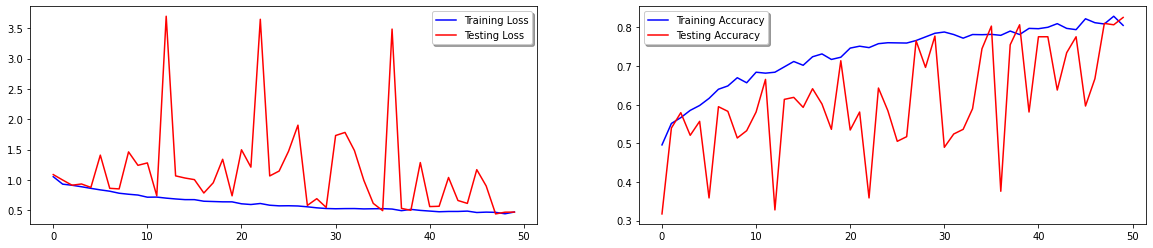

In [ ]:
fig, ax = plt.subplots(figsize=(20, 4), nrows=1, ncols=2)  

ax[0].plot(r.history['loss'], color='b', label="Training Loss")
ax[0].plot(r.history['val_loss'], color='r', label="Testing Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(r.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(r.history['val_accuracy'], color='r',label="Testing Accuracy")
legend = ax[1].legend(loc='best', shadow=True)  

In [ ]:
from sklearn.metrics import classification_report
ypred = model.predict(test_aug)
prediction = np.argmax(ypred, axis=1)
print(classification_report(test_aug.classes, prediction))

              precision    recall  f1-score   support

           0       0.77      0.69      0.72       134
           1       0.88      0.83      0.85       270
           2       0.78      0.91      0.84       176

    accuracy                           0.82       580
   macro avg       0.81      0.81      0.81       580
weighted avg       0.82      0.82      0.82       580



In [ ]:
import tensorflow as tf
from google.colab import files
# (to generate a SavedModel)
model.save('modelc1.h5')
files.download('modelc1.h5')




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten
# Feature Extraction Layer
model1 = Sequential()

model1.add(InputLayer(input_shape=[50,50,3]))
model1.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=2, padding='same'))
model1.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=2, padding='same'))
model1.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=2, padding='same'))
model1.add(Flatten())
# Fully Connected Layer
model1.add(Dense(128, activation='relu'))
model1.add(Dense(3, activation='softmax'))
# Print model summary
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 50, 50, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 25, 25, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 25, 25, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)        

In [ ]:
# tell the model what cost and optimization method to use
from tensorflow.keras.optimizers import Adam
model1.compile(
  loss='categorical_crossentropy',
  optimizer=Adam(lr=0.001),
  metrics=['accuracy']
)

In [ ]:
H1 = model1.fit_generator(
  train_aug,
  validation_data=test_aug,
  epochs=50,
  steps_per_epoch=len(train_aug),
  validation_steps=len(test_aug)
)      

Epoch 1/50
77/77 [==============================] - 35s 452ms/step - loss: 1.0366 - accuracy: 0.4808 - val_loss: 1.0212 - val_accuracy: 0.4966
Epoch 2/50
77/77 [==============================] - 34s 443ms/step - loss: 0.9947 - accuracy: 0.5139 - val_loss: 0.9238 - val_accuracy: 0.5724
Epoch 3/50
77/77 [==============================] - 34s 443ms/step - loss: 0.9030 - accuracy: 0.5694 - val_loss: 0.9019 - val_accuracy: 0.5672
Epoch 4/50
77/77 [==============================] - 34s 445ms/step - loss: 0.8868 - accuracy: 0.5829 - val_loss: 0.8467 - val_accuracy: 0.6086
Epoch 5/50
77/77 [==============================] - 34s 444ms/step - loss: 0.8645 - accuracy: 0.6000 - val_loss: 0.8261 - val_accuracy: 0.6086
Epoch 6/50
77/77 [==============================] - 34s 447ms/step - loss: 0.8178 - accuracy: 0.6273 - val_loss: 0.7873 - val_accuracy: 0.6293
Epoch 7/50
77/77 [==============================] - 34s 443ms/step - loss: 0.7805 - accuracy: 0.6453 - val_loss: 0.7571 - val_accuracy: 0.6259

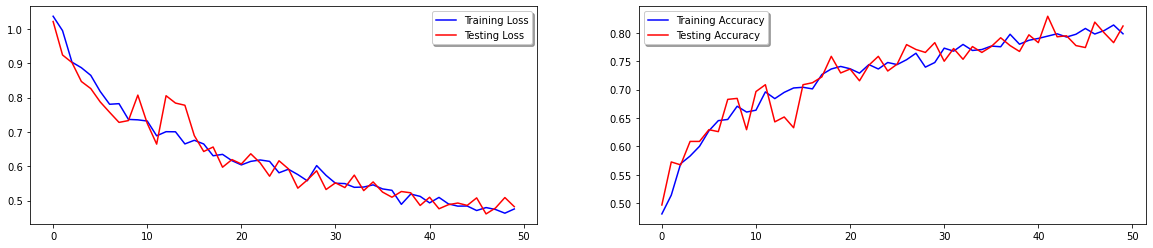

In [ ]:
fig, ax = plt.subplots(figsize=(20, 4), nrows=1, ncols=2)

ax[0].plot(H1.history['loss'], color='b', label="Training Loss")
ax[0].plot(H1.history['val_loss'], color='r', label="Testing Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(H1.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(H1.history['val_accuracy'], color='r',label="Testing Accuracy")
legend = ax[1].legend(loc='best', shadow=True) 

In [ ]:
from sklearn.metrics import classification_report
ypred = model1.predict(test_aug)
prediction = np.argmax(ypred, axis=1)
print(classification_report(test_aug.classes, prediction))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73       134
           1       0.85      0.83      0.84       270
           2       0.82      0.89      0.85       176

    accuracy                           0.82       580
   macro avg       0.81      0.81      0.81       580
weighted avg       0.82      0.82      0.82       580



In [ ]:
# (to generate a SavedModel) 
model1.save('modelc2.h5')
files.download('modelc2.h5')



from google.colab import files


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Tulis Kode Anda Disini
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, GlobalMaxPooling2D, AveragePooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D
model2 = Sequential()

model2.add(InputLayer(input_shape=[250,250,3]))
model2.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(GlobalAveragePooling2D())
model2.add(Flatten())

# Fully Connected Layer
model2.add(Dense(128, activation='relu'))
model2.add(Dense(3, activation='softmax'))

print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 250, 250, 16)      448       
                                                                 
 average_pooling2d (AverageP  (None, 125, 125, 16)     0         
 ooling2D)                                                       
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 average_pooling2d_1 (Averag  (None, 63, 63, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_8 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 average_pooling2d_2 (Averag  (None, 32, 32, 64)      

In [ ]:
# Compile model1
from tensorflow.keras.optimizers import Adam

model2.compile(optimizer=Adam(lr=0.001), 
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [ ]:
H2 = model2.fit_generator(
  train_aug,
  validation_data=test_aug,
  epochs=50,
  steps_per_epoch=len(train_aug),
  validation_steps=len(test_aug)
)      

Epoch 1/50
77/77 [==============================] - 35s 453ms/step - loss: 1.0557 - acc: 0.4616 - val_loss: 1.0332 - val_acc: 0.4655
Epoch 2/50
77/77 [==============================] - 34s 445ms/step - loss: 1.0266 - acc: 0.4800 - val_loss: 1.0134 - val_acc: 0.4931
Epoch 3/50
77/77 [==============================] - 34s 447ms/step - loss: 1.0134 - acc: 0.5004 - val_loss: 1.0237 - val_acc: 0.4810
Epoch 4/50
77/77 [==============================] - 34s 445ms/step - loss: 1.0120 - acc: 0.4845 - val_loss: 0.9677 - val_acc: 0.5172
Epoch 5/50
77/77 [==============================] - 34s 441ms/step - loss: 0.9885 - acc: 0.5053 - val_loss: 0.9547 - val_acc: 0.5362
Epoch 6/50
77/77 [==============================] - 34s 441ms/step - loss: 0.9659 - acc: 0.5253 - val_loss: 0.9916 - val_acc: 0.4931
Epoch 7/50
77/77 [==============================] - 34s 442ms/step - loss: 0.9469 - acc: 0.5380 - val_loss: 0.9642 - val_acc: 0.5345
Epoch 8/50
77/77 [==============================] - 34s 444ms/step - 

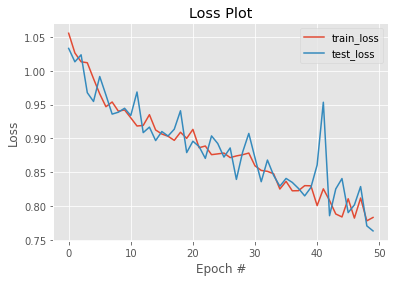

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H2.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H2.history["val_loss"], label="test_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

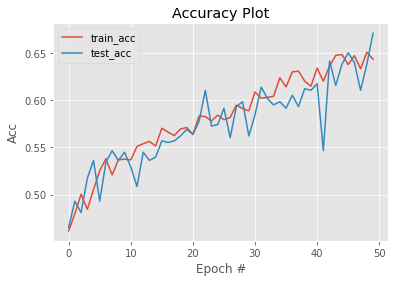

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H2.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), H2.history["val_acc"], label="test_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
ypred = model2.predict(test_aug)
prediction3 = np.argmax(ypred, axis=1)
print(classification_report(test_aug.classes, prediction3))

              precision    recall  f1-score   support

           0       0.58      0.32      0.41       134
           1       0.73      0.71      0.72       270
           2       0.58      0.80      0.67       176

    accuracy                           0.65       580
   macro avg       0.63      0.61      0.60       580
weighted avg       0.65      0.65      0.64       580



In [ ]:
import tensorflow as tf
model2.save('model3.h5')

from google.colab import files
files.download('model3.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>